In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import gamma
from arch import arch_model
import importlib

import base, bivariate, marginals, utils, tests, plots

importlib.reload(base)
importlib.reload(utils)
importlib.reload(bivariate)
importlib.reload(marginals)
importlib.reload(plots)
importlib.reload(tests)


from marginals import Normal, StudentsT


plt.rcParams['figure.figsize'] = (6.4, 4.8)
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.dpi'] = 75

In [119]:
data_path = r"/Users/johnsorensen/Documents/Data.xlsx"

close = pd.read_excel(data_path, "Close", index_col = 0, header = 0)

In [101]:
equity_ret = close.loc["2016":, "ES"].pct_change().dropna() * 100
bond_ret = close.loc["2016":, "US"].pct_change().dropna() * 100

In [102]:
def fit_vol_model(ret, vol_params):
    model = arch_model(ret, **vol_params)
    fitted_model = model.fit(disp = "off")

    cond_vol = fitted_model.conditional_volatility.dropna()
    residual = fitted_model.resid / cond_vol
    
    return {"Fitted Model": fitted_model,
           "Cond Vol": cond_vol,
           "Residual": residual}

In [134]:
# Removing Conditional Volatility

equity_results = fit_vol_model(equity_ret, {"p": 1, "q": 1, "o": 1, "dist": "normal", "vol": "EGARCH"})
bond_results = fit_vol_model(bond_ret, {"p": 1, "q": 1, "o": 1, "dist": "normal", "vol": "EGARCH"})

In [135]:
print(equity_results["Fitted Model"])

                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                     ES   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -2272.13
Distribution:                  Normal   AIC:                           4554.25
Method:            Maximum Likelihood   BIC:                           4581.71
                                        No. Observations:                 1794
Date:                Sun, Feb 18 2024   Df Residuals:                     1793
Time:                        17:32:48   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0574  1.528e-02      3.755  1.735e-04 [2.

In [136]:
print(bond_results["Fitted Model"])

                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                     US   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1735.52
Distribution:                  Normal   AIC:                           3481.03
Method:            Maximum Likelihood   BIC:                           3508.49
                                        No. Observations:                 1794
Date:                Sun, Feb 18 2024   Df Residuals:                     1793
Time:                        17:32:48   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.1475e-03  1.418e-02      0.151      0.880 

In [137]:
equity_residual = equity_results["Residual"]
bond_residual = bond_results["Residual"]


equity_ranks = equity_residual.rank(pct = True).values
bond_ranks = bond_residual.rank(pct = True).values

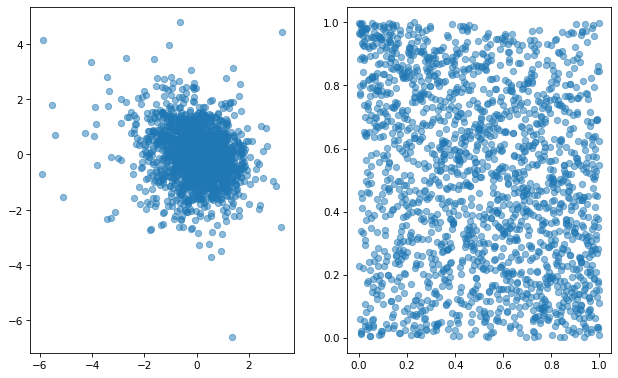

In [138]:
plots.rank_scatter(equity_residual, bond_residual, equity_ranks, bond_ranks)

In [139]:
copula1 = bivariate.Normal()
copula1.fit(equity_ranks, bond_ranks, adj = 1e-3, robust_cov = False)

In [140]:
print(copula1.summary())

                           Bivariate Copula Summary                           
Model Name:                    Normal   Log-Likelihood:                35.4905
Model Family:              Elliptical   AIC:                          -33.4905
Method:                          CMLE   BIC:                          -55.9966
Num. Params:                        1   Kendall's Tau:                 -0.1267
Num. Obs:                        1794   Spearman's Rho:                -0.1890
Date:                Sun, Feb 18 2024   Upper Tail Depend.:                 NA
Time:                        17:32:51   Lower Tail Depend.:                 NA
                                                                              
                                                                              
                              Parameter Estimates                              
             coef    std err       h0          t       P>|t|     95% Conf. Int.
--------------------------------------------------

In [141]:
copula2 = bivariate.StudentsT()
copula2.fit(equity_ranks, bond_ranks, adj = 1e-3, robust_cov = False)

In [142]:
print(copula2.summary())

                           Bivariate Copula Summary                           
Model Name:                 StudentsT   Log-Likelihood:                55.4633
Model Family:              Elliptical   AIC:                          -51.4633
Method:                          CMLE   BIC:                          -95.9421
Num. Params:                        2   Kendall's Tau:                 -0.1338
Num. Obs:                        1794   Spearman's Rho:                    nan
Date:                Sun, Feb 18 2024   Upper Tail Depend.:                 NA
Time:                        17:32:53   Lower Tail Depend.:                 NA
                                                                              
                                                                              
                              Parameter Estimates                              
             coef    std err       h0          t       P>|t|     95% Conf. Int.
--------------------------------------------------

In [143]:
def f():
    return 1, 2, 3

In [144]:
*x, y = f()

In [151]:
arr = np.atleast_1d(1)
out_shape = arr.shape

arr.reshape((9))

ValueError: cannot reshape array of size 1 into shape (9,)